# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы ФИО ГРУППА
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [2]:
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import copy
import random
import time
import pandas as pd #работа с таблицами

In [3]:
def get_matrix(file = None):
    if file is None: 
        file = 'matr.txt'
    print(file)
    with open('Lab6/' + file, "r", encoding = "utf-8") as file:
        matrix = [[int(num) for num in line.split(" ")] for line in file]
    if len(matrix) < 1:
        matrix = [[0, 3, 7, 0, 0, 0],
                  [0, 0, 4, 0, 0, 6],
                  [0, 0, 0, 3, 5, 8],
                  [0, 0, 0, 0, 2, 1],
                  [0, 0, 0, 0, 0, 5],
                  [0, 0, 0, 0, 0, 0]]
#     matrix = [[0, 3, 7, 0, 0, 0, 0, 0],
#               [0, 0, 4, 0, 0, 9, 11, 0],
#               [0, 0, 0, 3, 5, 8, 0, 0],
#               [0, 0, 0, 0, 2, 1, 4, 0],
#               [0, 0, 0, 0, 0, 3, 4, 7],
#               [0, 0, 0, 0, 0, 0, 2, 5],
#               [0, 0, 0, 0, 0, 0, 0, 3],
#               [0, 0, 0, 0, 0, 0, 0, 0]]
    matrix_orig = copy.deepcopy(matrix)
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
    return matrix, matrix_orig

def draw(matrix, edges = None):
    G = nx.from_numpy_matrix(np.matrix(matrix), create_using=nx.DiGraph)
    weights = nx.get_edge_attributes(G, 'weight') # список всех весов ребер
    pos = nx.circular_layout(G) # позиции вершин для визуализации графа
    nx.draw_networkx(G, pos=pos) # рисуем граф
    nx.draw_networkx_edge_labels(G, pos, edge_labels=weights) # рисуем веса ребер
    if edges != None:
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color="r", width=3) # Рисуем кратчайший путь

In [4]:
def generator_matrix(size = 10):
    matrix = [[math.inf for i in range(size)] for j in range(size)]
    for i in range(size):
        for j in range(size):
            if bool(random.getrandbits(1)) == True and i!=j:
                matrix[i][j] = random.randint(1, 50)
    return matrix

matr.txt


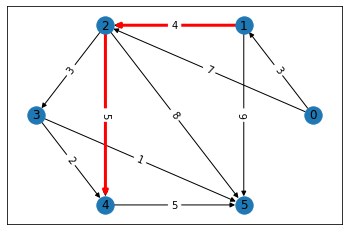

In [396]:
#Алгоритм Флойда-Уоршелла
matrix, matrix_orig = get_matrix()
def floyd(matrix):
    roads = [[0 for i in range(len(matrix))] for j in range(len(matrix))]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf:
                roads[i][j] = j
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf:
                for k in range(len(matrix)):
                    if matrix[i][k] > matrix[i][j] + matrix[j][k]:
                        matrix[i][k] = matrix[i][j] + matrix[j][k]
                        roads[i][k] = roads[i][j] #Если мы нашли путь от i до k используя промежуточную j короче чем прямой путь, то мы записываем шаг такой же как он был от i до j
    return matrix, roads
fr0m = 1
to = 4
i = fr0m
j = to
matrix, roads = floyd(matrix)
summ = 0
edges = []
temp = fr0m
while i != j:
    i = roads[i][j]
    summ += matrix[temp][i]
    edges.append([temp, i])
    temp = i
if edges[0][0] == fr0m and edges[-1][1] == to:
    draw(matrix_orig, edges)
else:
    print("Пути нет ;c")
    draw(matrix_orig)
    
# print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in matrix]))
# print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in roads]))


matr.txt
[[0, 1], [1, 5]]


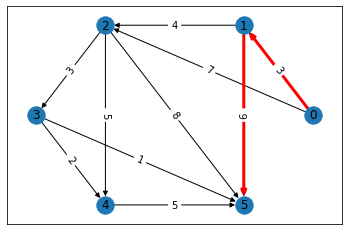

In [6]:
# Алгоритм Дейкстры
def dijkstra(matrix, fr0m, to): 
    node = fr0m # Стартовая вершина 
    checked_nodes = {node}
    weights = [math.inf] * len(matrix)
    weights[node] = 0 # Нулевой вес для стартовой вершины
    connections = [0]* len(matrix) # Оптимальные связи между вершинами
    while True:
        for i,temp in enumerate(matrix[node]): # перебираем все связанные вершины с вершиной v
            if i not in checked_nodes:
                weight = weights[node] + temp
                if weight < weights[i]: 
                    weights[i] = weight
                    connections[i] = node
                    
        node = -1 
        minn = math.inf
        for i, value in enumerate(weights): # находим следующий узел с наименьшим весом 
            if value < minn and i not in checked_nodes:
                minn = value
                node = i 
        if node == -1: # Если следующий узел не нашелся тогда сворачиваем шарманку 
            break
        else:
            checked_nodes.add(node) # если все нашлось чекаем дальше
    
    path = [to]
    edges = []
    iteration=0
    while to != fr0m and iteration < len(matrix)**2: # Получаем путь и ребра с конца а потом перевернем их там 
        temp = to
        try:
            to = connections[path[-1]]
        except BaseExceptions:
            return path, weights, edges
        path.append(to)
        edges.append([to,temp])
        iteration+=1
    edges = list(reversed(edges))
#     print(path)
    path = list(reversed(path))
    path = [el + 1 for el in path]
    return path, weights, edges
            
matrix, matrix_orig = get_matrix()
fr0m = 0
to = 5
path, weights, edges = dijkstra(matrix, fr0m, to)
print(edges)
if edges[0][0] == fr0m and edges[-1][1] == to:
    draw(matrix_orig, edges)
else:
    print("Пути нет ;c")
    draw(matrix_orig)

matr.txt


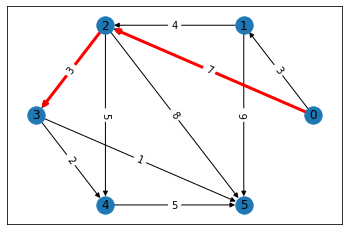

In [398]:
#Алгоритм Беллмана-Форда
def BellmanFord(matrix, fr0m, to):
    A = [[math.inf for i in range(len(matrix))] for j in range(len(matrix))]
    paths = [[fr0m] for i in range(len(matrix))]
    A[0][fr0m] = 0
    lastK = 0
    for k in range(1, len(matrix)):
        changes = False
        lastK = k
        A[k] = copy.deepcopy(A[k-1])
        for i in range(len(matrix)):
            for j in range(len(matrix)):
#                 print(k,i,j)
                if A[k][j] > A[k-1][i] + matrix[i][j]:
#                     print("ss")
                    changes = True
                    A[k][j] = A[k-1][i] + matrix[i][j]
                    paths[j] = copy.deepcopy(paths[i])
                    paths[j].append(j)
        if not changes: # Если при итерации никаких изменений, тогда сворачиваемся 
            break
#     print(paths)
#     print(A)
    edges = []
    for i in range(len(paths[to])-1):
        edges.append( [paths[to][i], paths[to][i+1]] )
    return A[lastK], edges

matrix, matrix_orig = get_matrix()
fr0m = 0
to = 3
A, edges = BellmanFord(matrix, fr0m, to)

if edges[0][0] == fr0m and edges[-1][1] == to:
    draw(matrix_orig, edges)
else:
    print("Пути нет ;c")
    draw(matrix_orig)

In [399]:
#Алгоритм Джонсона 
def Johnson(matrix):
    w = copy.deepcopy(matrix)
    for i in range(len(matrix)):
        w[i].append(math.inf)
    w.append([0 for i in range(len(matrix)+1)])
    
    A, edges = BellmanFord(w, len(matrix), 0)
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf and A[i] != math.inf and A[j] != math.inf:
                matrix[i][j] += A[i] - A[j]
    edges = []
    for i in range(len(matrix)):
        temp_edges = []
        for j in range(len(matrix)):
            path, weights, res = dijkstra(matrix, i, j)
#             print(res)
#             print()
            
            try:
                if res[0] != [0,0] and res[-1] != [0,0]:
                    temp_edges.append(res)
                else: 
                    temp_edges.append([-1,-1])
            except BaseException:
                temp_edges.append([-1,-1])
#                 print("Пошел нахуй")
        edges.append(temp_edges)
                
    return edges       

fr0m = 2
to = 5
matrix, matrix_orig = get_matrix()
edges = Johnson(matrix)
try:
    if edges[fr0m][to] != [-1,-1] and edges[0][0] == fr0m and edges[-1][1] == to:
        draw(matrix_orig, edges[fr0m][to])
    else:
        print("Пути нет ;c")
        draw(matrix_orig)
except BaseExceptions:
    

IndentationError: expected an indented block (Temp/ipykernel_17752/231070584.py, line 44)

matr.txt
Пути нет ;c


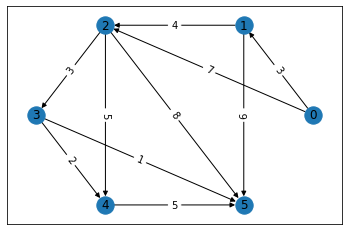

In [400]:
#Алгоритм Левита
def levit(matrix, fr0m, to):
    paths = [[fr0m] for i in range(len(matrix))]
    distance = [math.inf for i in range(len(matrix))]
    distance[fr0m] = 0
    m0 = []      # Вершины до которых мы уже все что надо вычислили
    m1 = [[],[]] # Вершины которые в очереди m1[0] - обычная очередь и m1[1] приоритеная очередь
    m1[0].append(fr0m) # Записываем в очередь изначальную точку 
    m2 =  [i for i in range(len(matrix))] # Вершины которые мы еще не трогали
    m2.remove(fr0m) # Убираем из m2 
#     print(m1, m2)
    while len(m1[0]) or len(m1[1]):
        if len(m1[1]): # берем узел из приоритетной очереди
            from_node = m1[1].pop(0)
        else:  # берем узел из обычной очереди
            from_node = m1[0].pop(0)
        for to_node in range(len(matrix)): # Перебираем все вершины
            if distance[to_node] != math.inf or matrix[from_node][to_node] != math.inf: # Если мы нашли расстояние до узла или из текущего узла можно туда прийти 
                d = distance[from_node] + matrix[from_node][to_node]  # Новое расстояние до этого узла 
                if to_node in m2: # Если мы еще ни разу не вычисляли до этой вершины ничего 
                    m2.remove(to_node) # Убираем из "еще не вычисляли" и потом закинем в очередь 
                    if d < distance[to_node]: # Если новое расстояние до этого узла меньше, чем которое мы знали 
                        distance[to_node] = d # Записываем новое расстояние 
                        paths[to_node] = copy.deepcopy(paths[from_node])
                        paths[to_node].append(to_node) # Записываем в путь до этого узла путь
                    m1[0].append(to_node) # добавляем в обычную очередь 
                elif to_node in m1[0] or to_node in m1[1]:
                    if d < distance[to_node]: # Если новое расстояние до этого узла меньше, чем которое мы знали 
                        distance[to_node] = d # Записываем новое расстояние 
                        paths[to_node] = copy.deepcopy(paths[from_node])
                        paths[to_node].append(to_node) # Записываем в путь до этого узла путь
                elif to_node in m0 and distance[to_node] > d:  # Если мы уже вычисляли, но нашли более быстрый маршрут 
                    m0.remove(to_node) # Убираем из вычисленных и кидаем в приоритетную очередь
                    m1[1].append(to_node)
                    if d < distance[to_node]: # Если новое расстояние до этого узла меньше, чем которое мы знали 
                        distance[to_node] = d # Записываем новое расстояние 
                        paths[to_node] = copy.deepcopy(paths[from_node])
                        paths[to_node].append(to_node) # Записываем в путь до этого узла путь
        m0.append(from_node) # Добавляем в уже вычисленные 
#     print(distance)
#     print(paths)
    path = paths[-1] # Получаем конечный путь 
    edges = [] # И формируем ребра ответа 
    for i in range(len(path)- 1):
        edges.append([path[i], path[i+1]])
    return edges
#     print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in paths]))
fr0m = 3
to = 0
matrix, matrix_orig = get_matrix()

edges  = levit(matrix, fr0m, to)

if edges[0][0] == fr0m and edges[-1][1] == to:
    draw(matrix_orig, edges)
else:
    print("Пути нет ;c")
    draw(matrix_orig)

matr1.txt
[[0, 2], [2, 3], [3, 5], [5, 7]]
Длина: 16


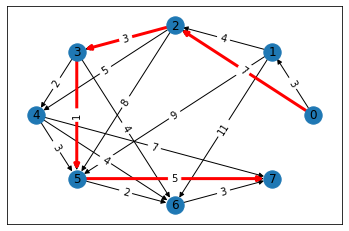

[[0, 1], [1, 2], [2, 3], [3, 5], [5, 7]]
Длина: 16


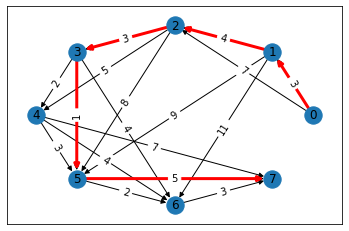

[[0, 1], [1, 2], [2, 3], [3, 5], [5, 6], [6, 7]]
Длина: 16


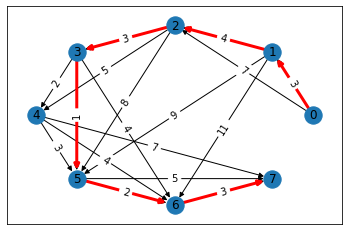

[[0, 2], [2, 3], [3, 5], [5, 6], [6, 7]]
Длина: 16


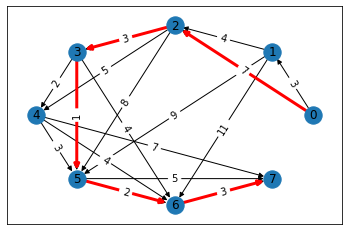

[[0, 1], [1, 2], [2, 3], [3, 6], [6, 7]]
Длина: 17


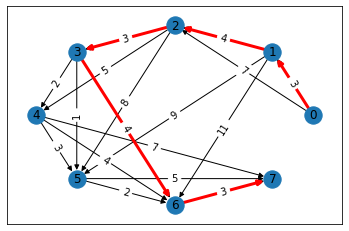

In [7]:
def yen(matrix, v, u, K):
    N = len(matrix)
    path, weights, edges = dijkstra(matrix, v, u)
    candidates = set()
    paths = [[el - 1 for el in path]]
    lengths = [weights[u]]
    if len(paths[0]) < 2:
        return ([], [])
    for k in range (1, K):
        cur_mat = copy.deepcopy(matrix)
        for i in range(len(paths[-1]) - 1):
            spur_node = paths[-1][i]
            root_path = paths[-1][:i + 1]
            
            for path in paths:
                if root_path == path[:i + 1]:
                    cur_mat[path[i]][path[i + 1]] = math.inf
            
            for node in root_path:
                if node != spur_node:
                    cur_mat[node] = [math.inf for j in range(N)]
            path, weights, edges = dijkstra(cur_mat, spur_node, u)
            spur_path = [el - 1 for el in path[1:]]
            if len(spur_path) < 1:
                continue
            
            total_path = root_path
            total_path.extend(spur_path)
            total_path = tuple(total_path)
            distance = 0
            for j in range(1, len(total_path)):
                distance += matrix[total_path[j - 1]][total_path[j]]

            candidates.add((total_path, distance))
        if len(candidates) == 0:
            break
        
        sorted_candidates = list(candidates)
        sorted_candidates.sort(key = lambda x : x[1])
        paths.append(list(sorted_candidates[0][0]))
        lengths.append(sorted_candidates[0][1])
        candidates.remove(sorted_candidates[0])
    for i in range(len(paths)):
        paths[i] = [el for el in paths[i]]
    return paths, lengths

fr0m = 0
to = 7
k = 5
matrix, matrix_orig = get_matrix("matr1.txt")
paths, lengths = yen(matrix, fr0m, to, k)

# while True:
#     print()
#     N = int(input("Найдено " + str(len(paths)) + " маршрутов" + "\n\n" + "Какой вывести? Введите число от 1 до " + str(len(paths))))
#     if N > len(paths): 
#         continue
for i in range(len(paths)):
    edges = []
    for j in range(len(paths[i]) - 1):
        edges.append([paths[i][j],paths[i][j+1]])
    print(edges)
    if edges[0][0] == fr0m and edges[-1][1] == to:
        print("Длина:", lengths[i])
        draw(matrix_orig, edges)
        plt.show()
# draw(matrix_orig)
# plt.show()
# matrix = [[0, 3, 7, 0, 0, 0],
#       [0, 0, 4, 0, 0, 6],
#       [0, 0, 0, 3, 5, 8],
#       [0, 0, 0, 0, 2, 1],
#       [0, 0, 0, 0, 0, 5],
#       [0, 0, 0, 0, 0, 0]]
# draw(matrix)    
# plt.show()

In [402]:
res = [[0 for i in range(9)] for j in range(20)]
for iteration in range(20):
    print("Итерация: ", iteration)
    matrix = generator_matrix(size = (iteration+1) * 10)
    N = len(matrix) # Количество вершин
    E = 0 # Количество ребер
    for i in range(N):
        for j in range(N):
            if matrix[j][i] != math.inf:
                E += 1
    res[iteration][0] = iteration+1
    res[iteration][1] = N
    res[iteration][2] = E
    
    fr0m = random.randint(1, len(matrix) // 2)
    to   = random.randint(1, len(matrix))
    #Алгоритм флойда 
    start_time = time.time()
    result = floyd(matrix)
    end_time = time.time()
    res[iteration][3] = round((end_time - start_time) * 1000, 6)
    # Алгоритм Дейкстры
    start_time = time.time()
    result = dijkstra(matrix, fr0m, to)
    end_time = time.time()
    res[iteration][4] = round((end_time - start_time) * 1000, 6)
    #Алгоритм Беллмана-Форда
    start_time = time.time()
    result = BellmanFord(matrix, fr0m, to)
    end_time = time.time()
    res[iteration][5] = round((end_time - start_time) * 1000, 6)
    #Алгоритм Джонсона 
    start_time = time.time()
    result = Johnson(matrix)
    end_time = time.time()
    res[iteration][6] = round((end_time - start_time) * 1000, 6)
    #Алгоритм Левита
    start_time = time.time()
    result = levit(matrix, fr0m, to)
    end_time = time.time()
    res[iteration][7] = round((end_time - start_time) * 1000, 6)
    #Алгоритм Йена
    k = len(matrix) // 3
    start_time = time.time()
    result = yen(matrix, fr0m, to, k)
    end_time = time.time()
    res[iteration][8] = round((end_time - start_time) * 1000, 6)
    
print(res)
pd.DataFrame(res, columns = ["Итерация", "Количество узлов", "Количество ребер", "Алгоритм Флойда (мс)", "Алгоритм Дейкстры (мс)", "Алгоритм Беллмана-Форда (мс)", "Алгоритм Джонсона (мс)", "Алгоритм Левита (мс)", "Алгоритм Йена (мс)",])

Итерация:  0
Итерация:  1
Итерация:  2
Итерация:  3
Итерация:  4
Итерация:  5
Итерация:  6
Итерация:  7
Итерация:  8
Итерация:  9
Итерация:  10
Итерация:  11
Итерация:  12
Итерация:  13
Итерация:  14
Итерация:  15
Итерация:  16
Итерация:  17
Итерация:  18
Итерация:  19
[[1, 10, 35, 0.0, 0.0, 0.0, 4.999876, 0.0, 0.0], [2, 20, 196, 3.999233, 0.0, 1.001596, 54.003477, 0.0, 3.999949], [3, 30, 455, 10.998011, 1.000166, 2.001762, 270.020247, 2.001047, 20.003319], [4, 40, 759, 23.999453, 0.0, 3.002167, 820.060492, 3.001928, 45.005083], [5, 50, 1235, 43.003798, 1.003504, 3.997087, 2066.283464, 6.998539, 91.007948], [6, 60, 1811, 70.005894, 0.999689, 6.002188, 4429.216385, 7.000446, 149.013281], [7, 70, 2472, 125.015736, 1.001835, 6.00028, 7416.428804, 9.000778, 212.007284], [8, 80, 3214, 165.988922, 3.000736, 13.001919, 12541.565418, 16.00337, 294.087648], [9, 90, 4024, 230.947733, 2.954006, 10.244846, 22513.922691, 22.002697, 526.424646], [10, 100, 4966, 394.031525, 4.999876, 14.000654, 30080

,Итерация,Количество узлов,Количество ребер,Алгоритм Флойда (мс),Алгоритм Дейкстры (мс),Алгоритм Беллмана-Форда (мс),Алгоритм Джонсона (мс),Алгоритм Левита (мс),Алгоритм Йена (мс)
0,1,10,35,0.000000,0.000000,0.000000,4.999876,0.000000,0.000000
1,2,20,196,3.999233,0.000000,1.001596,54.003477,0.000000,3.999949
2,3,30,455,10.998011,1.000166,2.001762,270.020247,2.001047,20.003319
3,4,40,759,23.999453,0.000000,3.002167,820.060492,3.001928,45.005083
4,5,50,1235,43.003798,1.003504,3.997087,2066.283464,6.998539,91.007948
5,6,60,1811,70.005894,0.999689,6.002188,4429.216385,7.000446,149.013281
6,7,70,2472,125.015736,1.001835,6.000280,7416.428804,9.000778,212.007284
7,8,80,3214,165.988922,3.000736,13.001919,12541.565418,16.003370,294.087648
8,9,90,4024,230.947733,2.954006,10.244846,22513.922691,22.002697,526.424646
9,10,100,4966,394.031525,4.999876,14.000654,30080.265045,36.002159,947.075844
